In [1]:
# import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

# LATAR BELAKANG & PROBLEM STATEMENT

Overview : Sebuah retail store yang berfokus pada penjualan barang kepada pelanggan.

Tim bisnis menyadari bahwa bisnis telah berkembang, tetapi belum memahami karakteristik pelanggan. Tim bisnis ingin memahami pola dan karakter dari customer, value dari mereka, serta bagaimana cara meng-approach mereka. 

Tujuannya adalah untuk meningkatkan jumlah pelanggan tetap/berulang dan menarik pelanggan baru. Tim bisnis ingin mengetahuai bagaimana cara terbaik untuk melakukan ini berdasarkan dari perilaku pembelian pelanggan dan menyusun strategi baru untuk menarik banyak pelanggan baru. Oleh karena itu, diperlukan adanya thematic campaign dengan metode RFM.



Rumusan Masalah & Tujuan:
- Melakukan segmentasi pelanggan dengan menggunakan metode RFM
- Mengetahui produk terbaik dari tiap segmen pelanggan.
- Menyusun perlakuan terbaik berdasarkan tiap segmen pelanggan.

# DATA CLEANING AND PRE-PROCESSING

In [3]:
df= pd.read_csv('scanner_data.csv').drop("Unnamed: 0", axis=1)
df

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88
...,...,...,...,...,...,...,...
131701,04/07/2016,20203,32900,IEV,FO112,3.0,6.46
131702,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50
131703,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19
131704,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            131706 non-null  object 
 1   Customer_ID     131706 non-null  int64  
 2   Transaction_ID  131706 non-null  int64  
 3   SKU_Category    131706 non-null  object 
 4   SKU             131706 non-null  object 
 5   Quantity        131706 non-null  float64
 6   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 7.0+ MB


Terdapat 6 kolom di dataframe. Adapun deskripsi dari masing-masing kolom adalah sebagai berikut,

- Date: Tanggal transaksi dilakukan dalam format DD/MM/YYYY
- Customer_ID: ID unik yang mengidentifikasi setiap pelanggan. Digunakan untuk melacak pembelian per pelanggan.
- Transaction_ID: ID unik yang mengidentifikasi setiap transaksi di toko retail. Berguna untuk analisis transaksi
- SKU_Category: Kategori barang berdasarkan SKU (Stock Keeping Unit). Mengindikasikan jenis produk yang dijual
- SKU: Stock Keeping Unit, yaitu kode unik untuk setiap produk. Digunakan untuk mengelola inventaris
- Quantity: Jumlah produk yang dibeli dalam transaksi tertentu
- Sales_Amount: Jumlah penjualan dalam transaksi tertentu, biasanya dalam mata uang yang relevan

  
Ada beberapa step data cleaning yang perlu dilakukan,
- Mengubah date column into datetime
- Membuat new columns, Price (unit price of 1 unit)
- Cek missing value and duplicate

Pertama, mengubah column date into datetime

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,2016-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2016-01-02,822,2,2ML,68BRQ,1.0,5.46
2,2016-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,2016-01-02,3719,4,0H2,549KK,1.0,5.59
4,2016-01-02,9200,5,0H2,K8EHH,1.0,6.88
...,...,...,...,...,...,...,...
131701,2016-07-04,20203,32900,IEV,FO112,3.0,6.46
131702,2016-07-04,20203,32900,N8U,I36F2,1.0,4.50
131703,2016-07-04,20203,32900,U5F,4X8P4,1.0,5.19
131704,2016-07-04,20203,32900,0H2,ZVTO4,1.0,4.57


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            131706 non-null  datetime64[ns]
 1   Customer_ID     131706 non-null  int64         
 2   Transaction_ID  131706 non-null  int64         
 3   SKU_Category    131706 non-null  object        
 4   SKU             131706 non-null  object        
 5   Quantity        131706 non-null  float64       
 6   Sales_Amount    131706 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 7.0+ MB


Cek missing values,

In [9]:
df.isna().sum()

Date              0
Customer_ID       0
Transaction_ID    0
SKU_Category      0
SKU               0
Quantity          0
Sales_Amount      0
dtype: int64

Tidak ada missing values

Membuat kolom baru (Price), yang menunjukkan harga satuan,

In [12]:
df['Price'] = df['Sales_Amount'] / df['Quantity']
df

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Price
0,2016-01-02,2547,1,X52,0EM7L,1.0,3.13,3.130000
1,2016-01-02,822,2,2ML,68BRQ,1.0,5.46,5.460000
2,2016-01-02,3686,3,0H2,CZUZX,1.0,6.35,6.350000
3,2016-01-02,3719,4,0H2,549KK,1.0,5.59,5.590000
4,2016-01-02,9200,5,0H2,K8EHH,1.0,6.88,6.880000
...,...,...,...,...,...,...,...,...
131701,2016-07-04,20203,32900,IEV,FO112,3.0,6.46,2.153333
131702,2016-07-04,20203,32900,N8U,I36F2,1.0,4.50,4.500000
131703,2016-07-04,20203,32900,U5F,4X8P4,1.0,5.19,5.190000
131704,2016-07-04,20203,32900,0H2,ZVTO4,1.0,4.57,4.570000


Cek apakah ada duplicated data,

In [14]:
df.duplicated().sum()

0

Tidak ada duplicated data.

# DATA UNDERSTANDING

Melakukan eksplorasi data (data understanding) sebelum dilakukan proses analisis. Pertama, mengecek deskriptif statistik dari data,

In [18]:
df.describe()

,Date,Customer_ID,Transaction_ID,Quantity,Sales_Amount,Price
count,131706,131706.000000,131706.000000,131706.000000,131706.000000,131706.000000
mean,2016-07-04 18:00:03.608036096,12386.450367,32389.604187,1.485311,11.981524,9.692429
min,2016-01-02 00:00:00,1.000000,1.000000,0.010000,0.020000,0.015000
25%,2016-04-05 00:00:00,7349.000000,16134.000000,1.000000,4.230000,3.680000
50%,2016-07-02 00:00:00,13496.000000,32620.000000,1.000000,6.920000,6.070000
75%,2016-10-07 00:00:00,17306.000000,48548.000000,1.000000,12.330000,10.100000
max,2016-12-31 00:00:00,22625.000000,64682.000000,400.000000,707.730000,693.800000
std,NaN,6086.447552,18709.901238,3.872667,19.359699,14.944890


Range dari date adalah satu tahun (2016). Akan dilakukan pengecekan sebaran data dari tiap-tiap kolom.

Mengecek jumlah pelanggan, jumlah transaksi, dan total Sales_Amount,

In [151]:
df['Customer_ID'].nunique()

22625

In [153]:
df['Transaction_ID'].nunique()

64682

In [155]:
df['Sales_Amount'].sum()

1578038.6199999999

Berdasarkan data, terdapat total customer 22625, jumlah transaksi 64682, serta total sales_amount sebesar 1578038. Adapun transaksi dihitung dengan nunique, karena dalam 1 transaction id, jika pembelian barangnya lebih dari 1 jenis barang, maka 1 transaction id akan muncul lebih dari satu kali.

In [ ]:
Mengecek tren transaksi terhadap waktu dengan menggunakan lineplot,

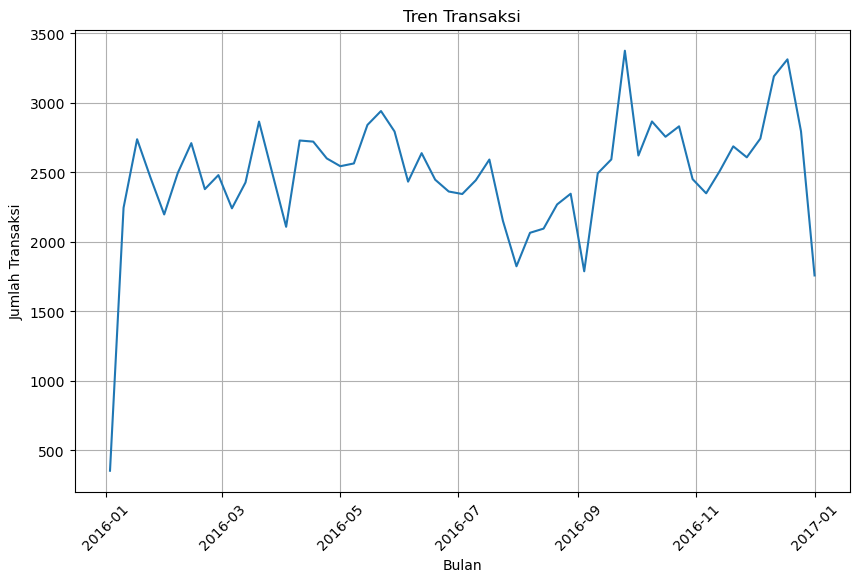

In [20]:
# Mengelompokkan data berdasarkan date dan menghitung jumlah transaksi
df_grouped_weekly_cnt = df.groupby(pd.Grouper(key='Date', freq='W'))['Transaction_ID'].count().reset_index()

# Membuat line plot dengan trendline
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Transaction_ID', data=df_grouped_weekly_cnt)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.title('Tren Transaksi')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Tren jumlah penjualan per minggu cenderung meningkat, dan mengalami peak di quartal akhir. Kemudian, cek tren sales amount per minggu,

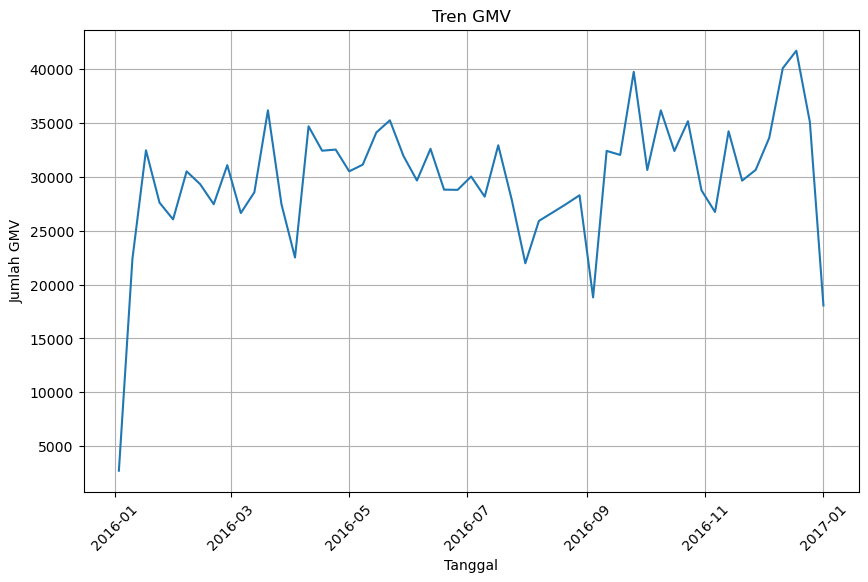

In [22]:
# Mengelompokkan data berdasarkan date dan menghitung jumlah sales
df_grouped_weekly_sales = df.groupby(pd.Grouper(key='Date', freq='W'))['Sales_Amount'].sum().reset_index()

# Membuat line plot dengan trendline
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Sales_Amount', data=df_grouped_weekly_sales)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah GMV')
plt.title('Tren GMV')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Tren GMV cukup mirip dengan tren jumlah penjualan, meningkat seiring berjalannya waktu, dan mengalami peak di quartal akhir.

Mengecek top 10 kategori (SKU_Category) dari perusahaan dengan menggunakan barplot,

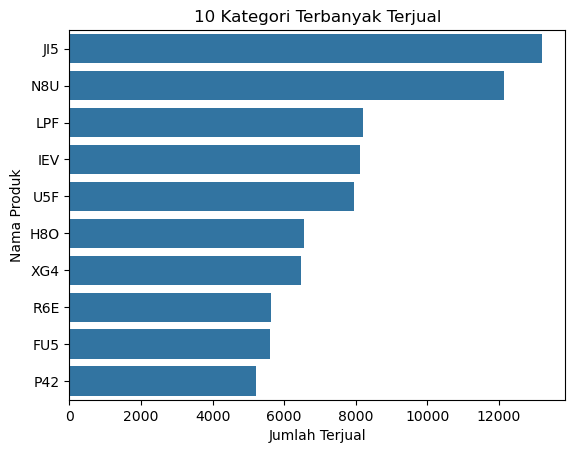

In [24]:
data_produk1 = df.groupby('SKU_Category')['Quantity'].sum().reset_index()

# Urutkan berdasarkan jumlah penjualan secara descending
data_produk1 = data_produk1.sort_values(by='Quantity', ascending=False)

# Ambil 10 produk teratas
top_10_kategori = data_produk1.head(10)

# Buat bar plot menggunakan Seaborn
sns.barplot(x='Quantity', y='SKU_Category', data=top_10_kategori)
plt.xlabel('Jumlah Terjual')
plt.ylabel('Nama Produk')
plt.title('10 Kategori Terbanyak Terjual')
plt.show()

Kemudian, mengecek top 10 produk (SKU) terbanyak yang terjual,

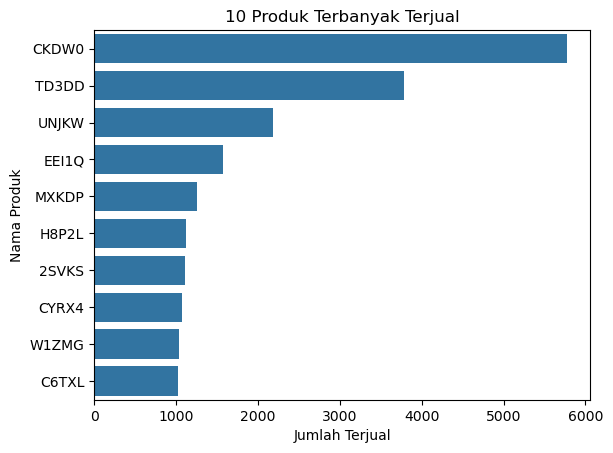

In [26]:
data_produk2 = df.groupby('SKU')['Quantity'].sum().reset_index()

# Urutkan berdasarkan jumlah penjualan secara descending
data_produk2 = data_produk2.sort_values(by='Quantity', ascending=False)

# Ambil 10 produk teratas
top_10_produk = data_produk2.head(10)

# Buat bar plot menggunakan Seaborn
sns.barplot(x='Quantity', y='SKU', data=top_10_produk)
plt.xlabel('Jumlah Terjual')
plt.ylabel('Nama Produk')
plt.title('10 Produk Terbanyak Terjual')
plt.show()

Produk CKDWO merupakan produk yang paling banyak terjual, diikuti TD3DD dan UNJKW. Perusahaan dapat memfokuskan penjualan ke 3 produk ini untuk meningkatkan jumlah penjualan produk.

Membuat barplot produk dan kategori berdasarkan sales_amount terbanyak,

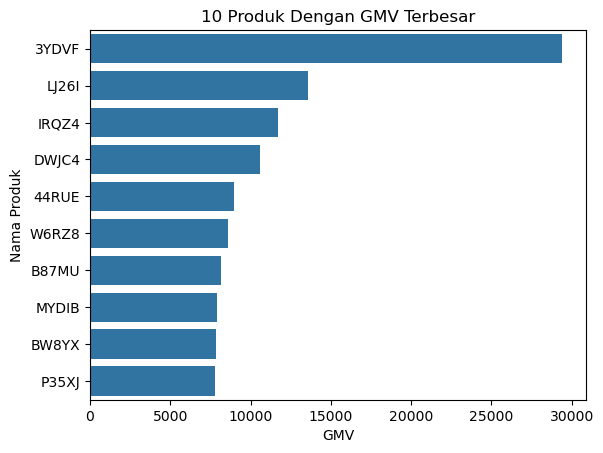

In [29]:
data_produk3 = df.groupby('SKU')['Sales_Amount'].sum().reset_index()

# Urutkan berdasarkan sales_amount secara descending
data_produk3 = data_produk3.sort_values(by='Sales_Amount', ascending=False)

# Ambil 10 produk teratas
top_10_produk = data_produk3.head(10)

# Buat bar plot menggunakan Seaborn
sns.barplot(x='Sales_Amount', y='SKU', data=top_10_produk)
plt.xlabel('GMV')
plt.ylabel('Nama Produk')
plt.title('10 Produk Dengan GMV Terbesar')
plt.show()

3YDVF merupakan produk yang menghasilkan GMV terbesar di perusahaan ini, tetapi tidak termasuk dalam top 10 produk dengan penjualan terbesar. Perusahaan dapat menfokuskan untuk meningkatkan penjualan 3YDVF.

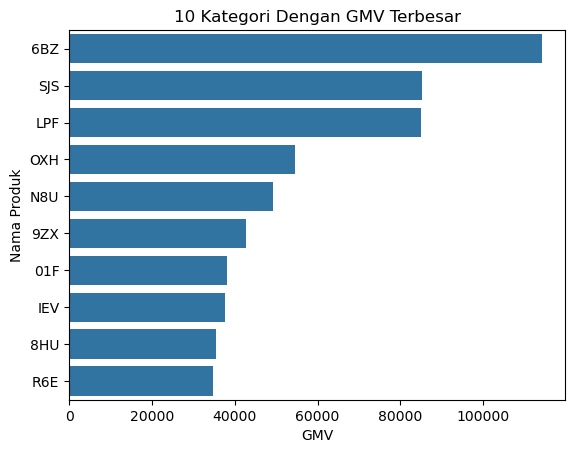

In [31]:
data_produk4 = df.groupby('SKU_Category')['Sales_Amount'].sum().reset_index()

# Urutkan berdasarkan sales_amount secara descending
data_produk4 = data_produk4.sort_values(by='Sales_Amount', ascending=False)

# Ambil 10 produk teratas
top_10_produk = data_produk4.head(10)

# Buat bar plot menggunakan Seaborn
sns.barplot(x='Sales_Amount', y='SKU_Category', data=top_10_produk)
plt.xlabel('GMV')
plt.ylabel('Nama Produk')
plt.title('10 Kategori Dengan GMV Terbesar')
plt.show()

Melihat sebaran data numerikal dengan menggunakan histogram,

In [33]:
numerical_cols = df.select_dtypes(include='number').columns
numerical_cols

Index(['Customer_ID', 'Transaction_ID', 'Quantity', 'Sales_Amount', 'Price'], dtype='object')

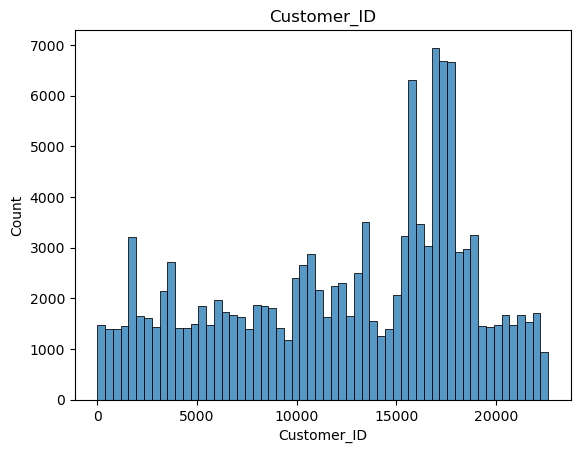

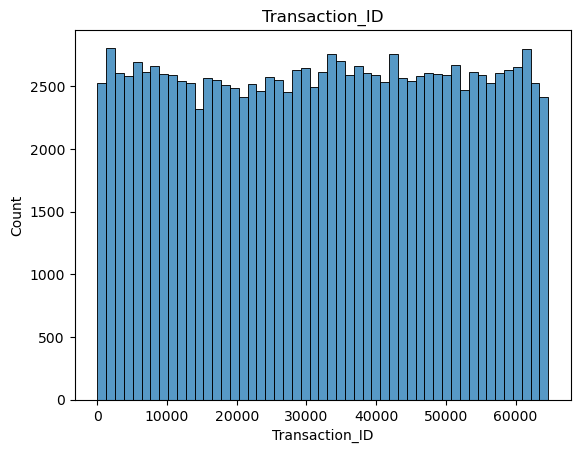

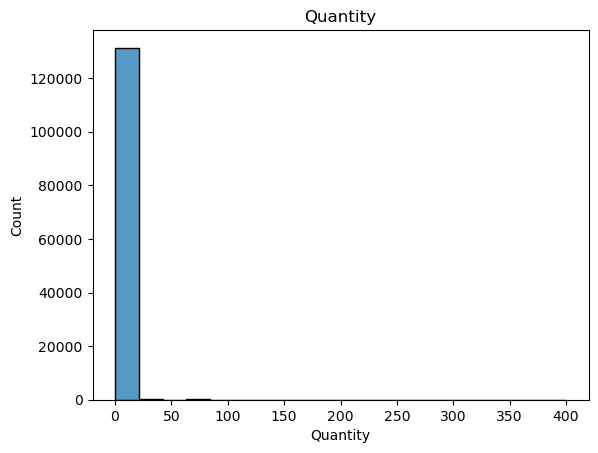

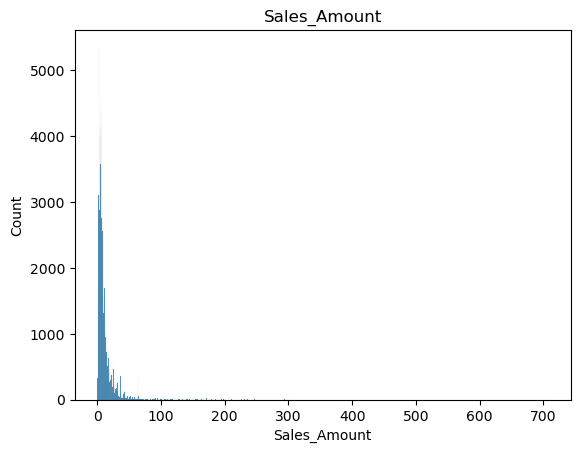

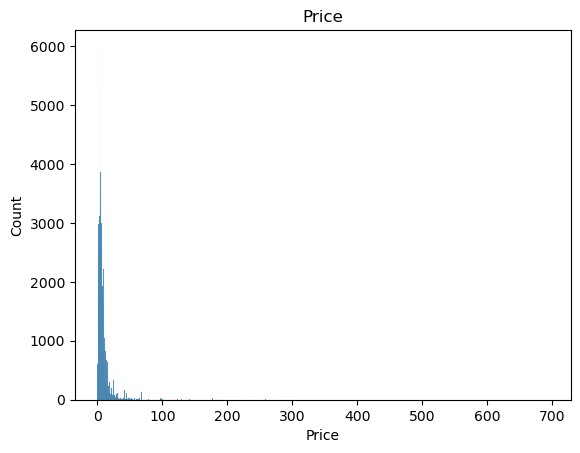

In [34]:
for i in numerical_cols:
    sns.histplot(data=df, x=i)
    plt.title(i)
    plt.show()

Terdapat outliers di numerical columns. Karena kami menggunakan binning berdasarkan urutan persentil (qcut), outlier dapat diabaikan.

Melakukan pengecekan sebaran data dengan menggunakan pair plot,

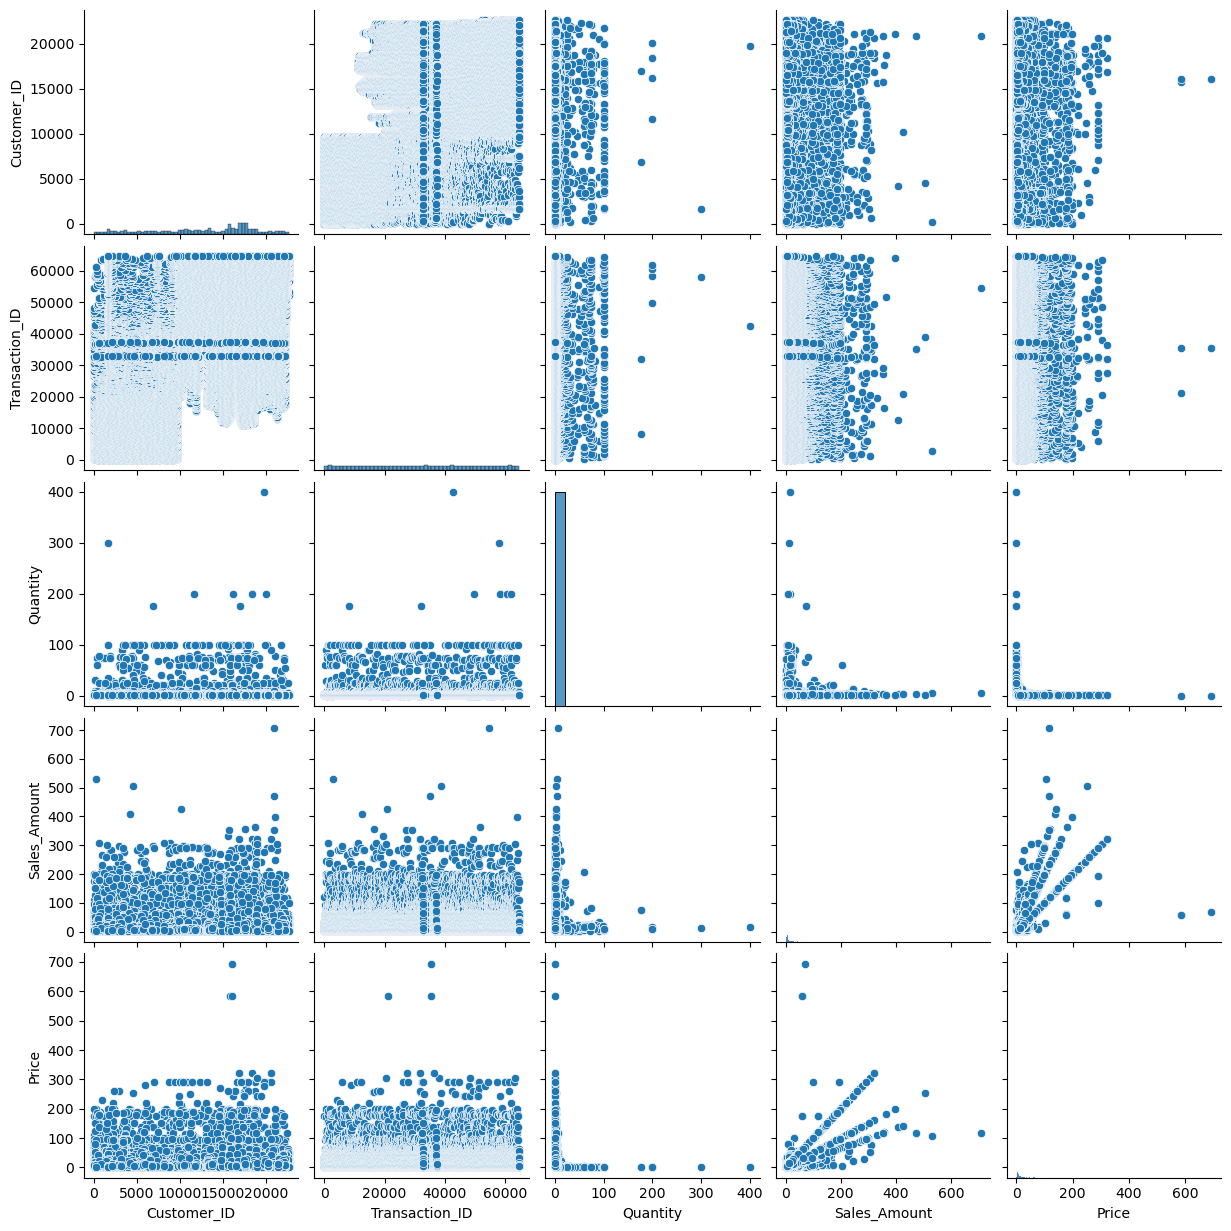

In [36]:
sns.pairplot(data = df)
plt.show()

Berdasarkan scatter plot, terdapat korelasi antara sales_amount dan price

In [38]:
unique_counts = df.nunique()
unique_counts

Date                363
Customer_ID       22625
Transaction_ID    64682
SKU_Category        187
SKU                5242
Quantity             83
Sales_Amount       3233
Price              4316
dtype: int64

# RFM SCORING and ANALYSIS

Untuk melakukan thematic campaign, pertama kami akan melakukan RFM scoring and analysis. Segmentasi pelanggan akan dikelompokkan berdasarkan skor RFM. Setelah itu, akan dianalisis produk apa saja yang menjadi top penjualan dari masing-masing segment.

Definisikan reference date, yakni 1 hari setelah tanggal transaksi terbaru,

In [42]:
reference_date = df['Date'].max() + dt.timedelta(days=1)
reference_date

Timestamp('2017-01-01 00:00:00')

In [43]:
df

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Price
0,2016-01-02,2547,1,X52,0EM7L,1.0,3.13,3.130000
1,2016-01-02,822,2,2ML,68BRQ,1.0,5.46,5.460000
2,2016-01-02,3686,3,0H2,CZUZX,1.0,6.35,6.350000
3,2016-01-02,3719,4,0H2,549KK,1.0,5.59,5.590000
4,2016-01-02,9200,5,0H2,K8EHH,1.0,6.88,6.880000
...,...,...,...,...,...,...,...,...
131701,2016-07-04,20203,32900,IEV,FO112,3.0,6.46,2.153333
131702,2016-07-04,20203,32900,N8U,I36F2,1.0,4.50,4.500000
131703,2016-07-04,20203,32900,U5F,4X8P4,1.0,5.19,5.190000
131704,2016-07-04,20203,32900,0H2,ZVTO4,1.0,4.57,4.570000


Membuat RFM scoring, adapun scoring didasarkan oleh:

-Recency : Tanggal terakhir transaksi, semakin rendah nilai recency maka score akan semakin tinggi.

-Frequency : Jumlah transaksi. nunique digunakan karena jika customer dalam 1 pembelian membeli 5 produk, terhitung sebagai 5 entry dengan transaction id yang sama. Semakin tinggi nilai frequency, maka nilai score frequency akan semakin tinggi.

-Monetary : Jumlah harga total penjualan (Sales_Amount) atau bisa disebut GMV. Semakin tinggi nilai harga total penjualan, maka semakin tinggi nilai score monetary.

In [45]:
# Aggregate the data with descriptive column names
rfm_df = df.groupby('Customer_ID').agg(
    Last_Purchase_Date=('Date', 'max'),  # Get the date of the most recent transaction
    Frequency=('Transaction_ID', 'nunique'),         # Count the total number of transactions
    Monetary=('Sales_Amount', 'sum')            # Sum the total amount spent
).reset_index()

# Calculate Recency as the number of days between the reference date and the last purchase date
rfm_df['Recency'] = (reference_date - rfm_df['Last_Purchase_Date']).dt.days

# Reorder columns to have Recency in the correct place
rfm_df = rfm_df[['Customer_ID', 'Recency', 'Frequency', 'Monetary']]

rfm_df.head()


,Customer_ID,Recency,Frequency,Monetary
0,1,345,1,16.29
1,2,196,2,22.77
2,3,365,1,10.92
3,4,53,2,33.29
4,5,180,5,78.82


Mengecek sebaran skor dari monetary dan frequency,

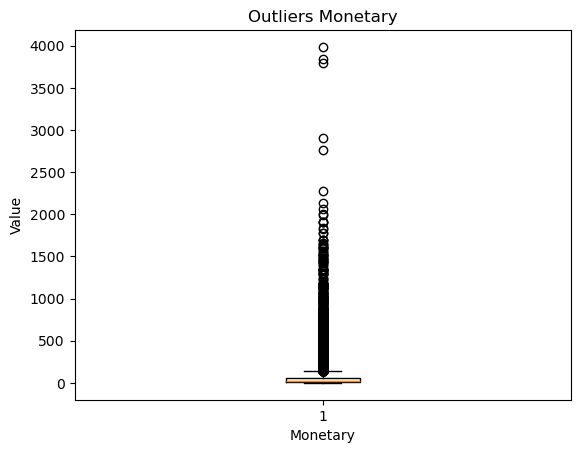

In [47]:
plt.boxplot(rfm_df['Monetary']) #boxplot
plt.title('Outliers Monetary') #title
plt.xlabel('Monetary') #xlabel
plt.ylabel('Value') #ylabel
plt.show()

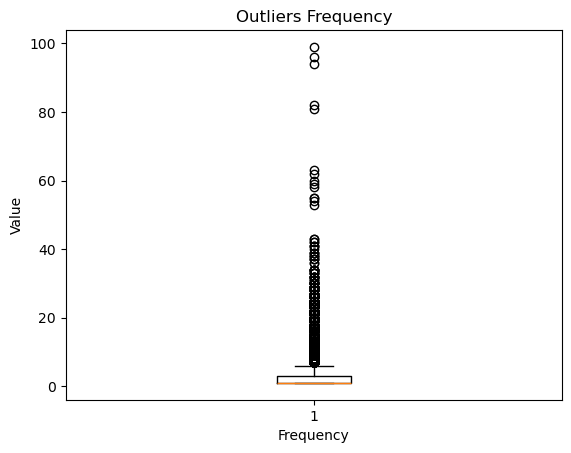

In [48]:
plt.boxplot(rfm_df['Frequency']) #boxplot
plt.title('Outliers Frequency') #title
plt.xlabel('Frequency') #xlabel
plt.ylabel('Value') #ylabel
plt.show()

RFM scoring dilakukanberdasarkan binning. Binning dilakukan sesuai percentile, sehingga digunakan metode qcut. Hal ini dilakukan karena kami ingin tetap menggunakan data-data outlier dalam analisis kami.

In [50]:
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [51]:
rfm_df

,Customer_ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,1,345,1,16.29,1,1,2
1,2,196,2,22.77,3,3,3
2,3,365,1,10.92,1,1,2
3,4,53,2,33.29,4,3,3
4,5,180,5,78.82,3,5,4
...,...,...,...,...,...,...,...
22620,22621,22,1,9.69,5,3,2
22621,22622,16,1,6.07,5,3,1
22622,22623,11,1,128.01,5,3,5
22623,22624,30,1,19.60,5,3,3


In [52]:
rfm_df['RFM_Score'] = rfm_df.R_Score.astype(str) + rfm_df.F_Score.astype(str) + rfm_df.M_Score.astype(str)

rfm_df

,Customer_ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,1,345,1,16.29,1,1,2,112
1,2,196,2,22.77,3,3,3,333
2,3,365,1,10.92,1,1,2,112
3,4,53,2,33.29,4,3,3,433
4,5,180,5,78.82,3,5,4,354
...,...,...,...,...,...,...,...,...
22620,22621,22,1,9.69,5,3,2,532
22621,22622,16,1,6.07,5,3,1,531
22622,22623,11,1,128.01,5,3,5,535
22623,22624,30,1,19.60,5,3,3,533


Melakukan RFM segmentation berdasarkan RFM score, dibagi menjadi 9 segmen pelanggan, yang akan dianalisis lebih mendalam serta mendapat perlakuan/campaign yang berbeda. Berikut adalah deskripsi dari segmen-segmen customer yang ada:

- **Hibernating**: Pelanggan yang tidak melakukan pembelian dalam waktu lama, nilai frequency dan monetary rendah.
- **At Risk**:  Pelanggan yang sebelumnya merupukan pelanggan aktif, tetapi belum melakukan pembelian dalam waktu dekat, indikasi potensi churn/loss.
- **Cannot Lose Them**: Pelanggan dengan score monetary tinggi, tetapi belum melakukan pembelian kembali dalam waktu yang cukup lama (score frequency dan recency rendah). Membutuhkan perhatian khusus untuk mencegah loss bagi perusahaan.
- **About to Sleep**: Pelanggan dengan nilai frequency dan recency menengah, dapat berhenti bertransaksi jika tidak ditangani.
- **Need Attention**: Pelanggan dengan potensi yang baik, yang butuh perhatian lebih untuk meningkatkan aktivitasnya.
- **Promising**: Pelanggan baru yang punya potensi menjadi pelanggan loyal atau high-value customers.
- **Champion**: Pelanggan yang sering melakukan pembelian, telah melakukan pembelian dalam waktu dekat, dan punya nilai belanja yang tinggi.
- **Loyal Customer**: Pelanggan loyal yang sering melakukan pembelian dan punya nilai monetary yang tinggi.
- **Potential Loyalist**: Pelanggan yang hampir loyal, tetapi belum sepenuhnya loyal, nilai frekuensi tinggi tetapi monetari menengah
- **New Customers**: Pelanggan yang baru saja melakukan pembelian dan masih melakukan eksplorasi dari produk.
- **Lost**: Pelanggan yang tidak melakukan pembelian dalam waktu yang cukup lama, dengan nilai frekuensi dan monetari yang rendah, dan kemungkinan akan churn.

In [54]:
# Create customer segments based on RFM score
Champion = [555, 554, 544, 545, 454, 455, 445]
Loyal_Customer = [543, 444, 435, 355, 354, 345, 344, 335]
Potential_Loyalist = [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323]
New_Customer = [512, 511, 422, 421, 412, 411, 311]
Promising = [525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313]
Need_Attention = [535, 534, 443, 434, 343, 334, 325, 324]
Cannot_Lose_Them = [155, 154, 144, 214,215,115, 114, 113]
About_to_Sleep = [331, 321, 312, 221, 213]
At_Risk = [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]
Hibernating = [332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211]
Lost = [111, 112, 121, 131, 141, 151]

# Create a function to assign customers to various customer segments based on RFM score
def assign_cust_seg(col):
    list_col = list(col)
    segment = list()
    for score in list_col:
        if score in Champion:
            value = 'Champion'
        elif score in Loyal_Customer:
            value = 'Loyal Customer'
        elif score in Potential_Loyalist:
            value = 'Potential Loyalist'
        elif score in New_Customer:
            value = 'New Customer'
        elif score in Promising:
            value = 'Promising'
        elif score in Need_Attention:
            value = 'Need Attention'
        elif score in Cannot_Lose_Them:
            value = 'Cannot Lose Them'
        elif score in About_to_Sleep:
            value = 'About to Sleep'
        elif score in At_Risk:
            value = 'At Risk'
        elif score in Hibernating:
            value = 'Hibernating'
        elif score in Lost:
            value = 'Lost'
        else:
            value = 'null'
        segment.append(value)
    return segment

# Assign customers to segments based on their RFM score
rfm_df['Customer Segment'] = assign_cust_seg(rfm_df['RFM_Score'].astype(int))
rfm_df.head(5)

,Customer_ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Customer Segment
0,1,345,1,16.29,1,1,2,112,Lost
1,2,196,2,22.77,3,3,3,333,Potential Loyalist
2,3,365,1,10.92,1,1,2,112,Lost
3,4,53,2,33.29,4,3,3,433,Potential Loyalist
4,5,180,5,78.82,3,5,4,354,Loyal Customer


Adapun banyaknya jumlah pelanggan berdasarkan Customer Segment adalah sebagai berikut,

In [56]:
pd.DataFrame(rfm_df['Customer Segment'].value_counts())

,count
Customer Segment,
Champion,3823
Hibernating,3178
Potential Loyalist,2915
At Risk,2507
Lost,1943
Loyal Customer,1912
About to Sleep,1578
Cannot Lose Them,1325
Need Attention,1277


In [ ]:
Berdasarkan value counts dari tiap segmen, membuat tree chart untuk visualisasi distribusi customer segment

In [57]:
pip install squarify --quiet

Note: you may need to restart the kernel to use updated packages.


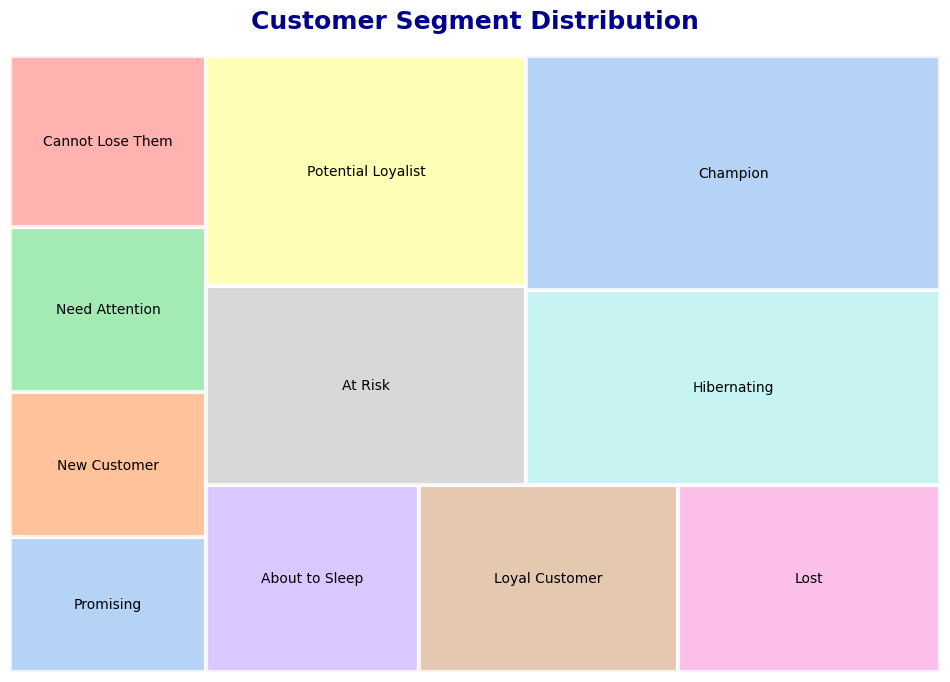

In [93]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

segment_counts = rfm_df['Customer Segment'].value_counts().reset_index()
segment_counts.columns = ['Customer Segment', 'count']

segment_counts = segment_counts.sort_values(by='count', ascending=True)

colors = sns.color_palette('pastel', len(segment_counts))

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=segment_counts['count'],
    label=segment_counts['Customer Segment'],
    color=colors,
    alpha=0.8,
    edgecolor='white',
    linewidth=3
)

plt.axis('off')
plt.title(
    'Customer Segment Distribution',
    fontsize=18,
    fontweight='bold',
    color='darkblue',
    pad=20
)

plt.show()

Champion, potential loyalist, hibernating, dan at risk, merupakan 4 segmen pelanggan yang memiliki jumlah terbanyak, berdasarkan visualisasi tree map ini. Visualisasi ini menunjukkan basis pelanggan yang beragam berdasarkan level of engagement dan karakteristik pembelian. Insight lebih dalam dapat diambil setelah visualisasi bubble chart.

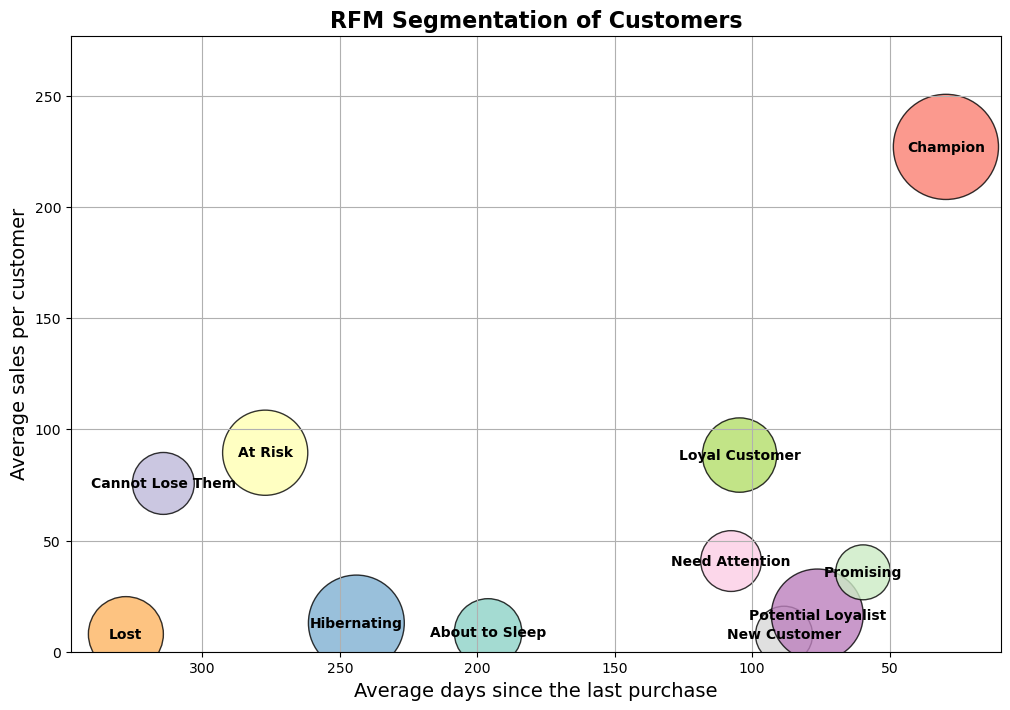

In [97]:
# Grouped summary statistics for RFM segments
segment_summary = rfm_df.groupby('Customer Segment').agg(
    avg_days_since_purchase=('Recency', 'mean'),
    avg_sales_per_customer=('Monetary', 'mean'),
    customer_count=('Customer_ID', 'count')
).reset_index()

# Plot configuration
plt.figure(figsize=(12, 8))

# Scatter plot for the segments
colors = sns.color_palette('Set3', n_colors=len(segment_summary))  # Define a color palette
scatter = plt.scatter(
    x=segment_summary['avg_days_since_purchase'],
    y=segment_summary['avg_sales_per_customer'],
    s=segment_summary['customer_count'] * 1.5,  # Bubble size scales with customer count
    c=colors,
    alpha=0.8,
    edgecolors='black'
)

# Add grid, title, and axis labels
plt.xlabel('Average days since the last purchase', fontsize=14)
plt.ylabel('Average sales per customer', fontsize=14)
plt.title('RFM Segmentation of Customers', fontsize=16, fontweight='bold')
plt.grid(True)

# Annotate each bubble with the segment name
for i, row in segment_summary.iterrows():
    plt.annotate(
        row['Customer Segment'],  # Segment name
        (row['avg_days_since_purchase'], row['avg_sales_per_customer']),
        ha='center',
        va='center',
        fontsize=10,
        weight='bold'
    )

# Reverse the x-axis so the most recent purchases appear on the right
plt.gca().invert_xaxis()

# Adjust limits for better spacing
plt.xlim(segment_summary['avg_days_since_purchase'].max() + 20, segment_summary['avg_days_since_purchase'].min() - 20)
plt.ylim(0, segment_summary['avg_sales_per_customer'].max() + 50)

# Display the plot
plt.show()

Champion merupakan segmen dengan jumlah pelanggan terbanyak. Segmen hibernating memiliki jumlah pelanggan yang cukup besar, yang jika tidak ditangani, dapat berubah menjadi 'lost' dan perusahaan dapat kehilangan banyak potensi penjualan. Selain itu, perusahaan ini memiliki banyak potential loyalist, yang perlu ditangani agar berubah menjadi pelanggan jangka-panjang yang loyal.

# CUSTOMER SEGMENT ANALYSIS

Customer Segment akan dianalisa dengan menggunakan variabel SKU_Category dan SKU_ID. Hal ini bertujuan untuk mengetahui kategori dan produk apa saja yang paling sering dibeli oleh masing-masing customer segment. Pertama, mengambil variabel customer segment dan merge data tersebut ke dataframe,

In [111]:
# Merge the original table 'df' with the segmentation table 'rfm_df'
new_df = df.merge(rfm_df[['Customer_ID', 'Customer Segment']], on='Customer_ID', how='left')

# Display the updated table with customer categories
new_df.head(10)

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Price,Customer Segment
0,2016-01-02,2547,1,X52,0EM7L,1.0,3.13,3.13,At Risk
1,2016-01-02,822,2,2ML,68BRQ,1.0,5.46,5.46,At Risk
2,2016-01-02,3686,3,0H2,CZUZX,1.0,6.35,6.35,Cannot Lose Them
3,2016-01-02,3719,4,0H2,549KK,1.0,5.59,5.59,Cannot Lose Them
4,2016-01-02,9200,5,0H2,K8EHH,1.0,6.88,6.88,Hibernating
5,2016-01-02,5010,6,JPI,GVBRC,1.0,10.77,10.77,Lost
6,2016-01-02,1666,7,XG4,AHAE7,1.0,3.65,3.65,Champion
7,2016-01-02,1666,7,FEW,AHZNS,1.0,8.21,8.21,Champion
8,2016-01-02,1253,8,0H2,9STQJ,1.0,8.25,8.25,Cannot Lose Them
9,2016-01-02,5541,9,N5F,7IE9S,1.0,8.18,8.18,At Risk


Kemudian, mencari top category dari masing-masing customer_id beserta customer segment-nya,

In [113]:
# Step 1: Group by Customer_ID, Segment, and SKU to calculate total Quantity and Sales
winning_products = new_df.groupby(['Customer_ID', 'Customer Segment', 'SKU_Category']).agg(
    total_purchases=('Quantity', 'sum'),  # Total quantity purchased
    total_sales=('Sales_Amount', 'sum')   # Total sales for each SKU
).reset_index()

# Step 2: Rank products within each Customer_ID and Segment based on total_purchases
winning_products['Rank'] = winning_products.groupby(['Customer_ID', 'Customer Segment'])['total_purchases'] \
    .rank(method='first', ascending=False)

# Step 3: Filter only the top-ranked product for each Customer_ID and Segment
top_products = winning_products[winning_products['Rank'] == 1]

# Step 4: Sort the results by total_purchases in descending order
top_products = top_products.sort_values(by='total_purchases', ascending=False)

# Display the results
top_products[['Customer_ID', 'Customer Segment', 'SKU_Category', 'total_purchases', 'total_sales']].head(10)

,Customer_ID,Customer Segment,SKU_Category,total_purchases,total_sales
55434,15649,Champion,JI5,590.0,144.19
79393,19791,Loyal Customer,H8O,400.0,16.37
67992,17471,Champion,H1H,372.0,1721.04
70487,17755,Champion,JI5,368.0,101.38
62280,16800,Champion,JI5,366.0,100.77
51808,14847,Champion,JI5,311.0,84.78
37731,11027,Champion,JI5,307.0,83.83
39865,11634,Promising,XG4,301.0,30.44
5352,1694,Champion,H8O,300.0,12.27
52888,15107,Champion,H8O,300.0,12.27


Menjumlahkan jumlah customer per tiap segmen, serta menunjukkan top 3 category dari masing-masing customer segment,

In [118]:
# Step 1: Group by Segment and SKU to calculate total purchases and sales
top_sku_by_segment = new_df.groupby(['Customer Segment', 'SKU_Category']).agg(
    total_purchases=('Quantity', 'sum'),
    total_sales=('Sales_Amount', 'sum')
).reset_index()

# Step 2: Rank products within each Segment based on total_purchases
top_sku_by_segment['Rank'] = top_sku_by_segment.groupby('Customer Segment')['total_purchases'] \
    .rank(method='first', ascending=False)

# Step 3: Filter to keep only the top 3 SKUs for each Segment
top_3_skus = top_sku_by_segment[top_sku_by_segment['Rank'] <= 3]

# Step 4: Sort the results for better readability
top_3_skus = top_3_skus.sort_values(by=['Customer Segment', 'Rank'])

# Display the results
df_top3_product_kategori_per_segment = top_3_skus[['Customer Segment', 'SKU_Category', 'total_purchases', 'total_sales', 'Rank']]
df_top3_product_kategori_per_segment

,Customer Segment,SKU_Category,total_purchases,total_sales,Rank
85,About to Sleep,N8U,265.000,992.83,1.0
128,About to Sleep,XG4,158.000,191.22,2.0
95,About to Sleep,P42,119.000,731.97,3.0
223,At Risk,JI5,2391.000,798.48,1.0
244,At Risk,N8U,1436.000,5621.64,2.0
232,At Risk,LPF,1270.326,13383.01,3.0
392,Cannot Lose Them,JI5,825.000,294.25,1.0
413,Cannot Lose Them,N8U,618.000,2548.64,2.0
401,Cannot Lose Them,LPF,560.670,5940.53,3.0
566,Champion,JI5,7343.000,2421.01,1.0


In [123]:
df_top3_product_kategori_per_segment.to_csv('df_top3_product_kategori_per_segment.csv')

Kemudian, dengan langkah-langkah yang sama, menunjukkan top produk (SKU) dari tiap customer segment,

In [126]:
# Merge the original table 'df' with the segmentation table 'rfm_df'
new_df = df.merge(rfm_df[['Customer_ID', 'Customer Segment']], on='Customer_ID', how='left')

# Display the updated table with customer categories
new_df.head(10)

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Price,Customer Segment
0,2016-01-02,2547,1,X52,0EM7L,1.0,3.13,3.13,At Risk
1,2016-01-02,822,2,2ML,68BRQ,1.0,5.46,5.46,At Risk
2,2016-01-02,3686,3,0H2,CZUZX,1.0,6.35,6.35,Cannot Lose Them
3,2016-01-02,3719,4,0H2,549KK,1.0,5.59,5.59,Cannot Lose Them
4,2016-01-02,9200,5,0H2,K8EHH,1.0,6.88,6.88,Hibernating
5,2016-01-02,5010,6,JPI,GVBRC,1.0,10.77,10.77,Lost
6,2016-01-02,1666,7,XG4,AHAE7,1.0,3.65,3.65,Champion
7,2016-01-02,1666,7,FEW,AHZNS,1.0,8.21,8.21,Champion
8,2016-01-02,1253,8,0H2,9STQJ,1.0,8.25,8.25,Cannot Lose Them
9,2016-01-02,5541,9,N5F,7IE9S,1.0,8.18,8.18,At Risk


In [128]:
# Step 1: Group by Customer_ID, Segment, and SKU to calculate total Quantity and Sales
winning_products = new_df.groupby(['Customer_ID', 'Customer Segment', 'SKU']).agg(
    total_purchases=('Quantity', 'sum'),  # Total quantity purchased
    total_sales=('Sales_Amount', 'sum')   # Total sales for each SKU
).reset_index()

# Step 2: Rank products within each Customer_ID and Segment based on total_purchases
winning_products['Rank'] = winning_products.groupby(['Customer_ID', 'Customer Segment'])['total_purchases'] \
    .rank(method='first', ascending=False)

# Step 3: Filter only the top-ranked product for each Customer_ID and Segment
top_products = winning_products[winning_products['Rank'] == 1]

# Step 4: Sort the results by total_purchases in descending order
top_products = top_products.sort_values(by='total_purchases', ascending=False)

# Display the results
top_products[['Customer_ID', 'Customer Segment', 'SKU', 'total_purchases', 'total_sales']].head(10)

,Customer_ID,Customer Segment,SKU,total_purchases,total_sales
66072,15649,Champion,MXKDP,590.0,144.19
97022,19791,Loyal Customer,CKDW0,400.0,16.37
82629,17471,Champion,XT0W3,370.0,1716.87
85941,17755,Champion,CYRX4,368.0,101.38
74906,16800,Champion,TD3DD,366.0,100.77
61527,14847,Champion,TD3DD,311.0,84.78
44771,11027,Champion,TD3DD,307.0,83.83
62798,15107,Champion,CKDW0,300.0,12.27
6573,1694,Champion,CKDW0,300.0,12.27
12785,3290,At Risk,BBC93,270.0,103.93


In [130]:
# Step 1: Group by Segment and SKU to calculate total purchases and sales
top_sku_by_segment = new_df.groupby(['Customer Segment', 'SKU']).agg(
    total_purchases=('Quantity', 'sum'),
    total_sales=('Sales_Amount', 'sum')
).reset_index()

# Step 2: Rank products within each Segment based on total_purchases
top_sku_by_segment['Rank'] = top_sku_by_segment.groupby('Customer Segment')['total_purchases'] \
    .rank(method='first', ascending=False)

# Step 3: Filter to keep only the top 3 SKUs for each Segment
top_3_skus = top_sku_by_segment[top_sku_by_segment['Rank'] <= 3]

# Step 4: Sort the results for better readability
top_3_skus = top_3_skus.sort_values(by=['Customer Segment', 'Rank'])

# Display the results
df_top3_product_per_segment = top_3_skus[['Customer Segment', 'SKU', 'total_purchases', 'total_sales', 'Rank']]
df_top3_product_per_segment

,Customer Segment,SKU,total_purchases,total_sales,Rank
637,About to Sleep,MAJO7,79.0,5.96,1.0
844,About to Sleep,UNJKW,48.0,97.79,2.0
100,About to Sleep,3R805,26.0,27.02,3.0
2055,At Risk,CKDW0,622.0,25.44,1.0
3401,At Risk,TD3DD,617.0,170.06,2.0
2446,At Risk,H8P2L,314.0,85.64,3.0
4685,Cannot Lose Them,CKDW0,206.0,8.42,1.0
4616,Cannot Lose Them,BBC93,180.0,68.73,2.0
5803,Cannot Lose Them,VWLV9,176.0,74.80,3.0
7590,Champion,CKDW0,3052.2,124.77,1.0


In [132]:
df_top3_product_per_segment.to_csv('top3_product_per_segment.csv')

Visualisasi dari top 3 produk dari tiap segmen, adalah sebagai berikut,

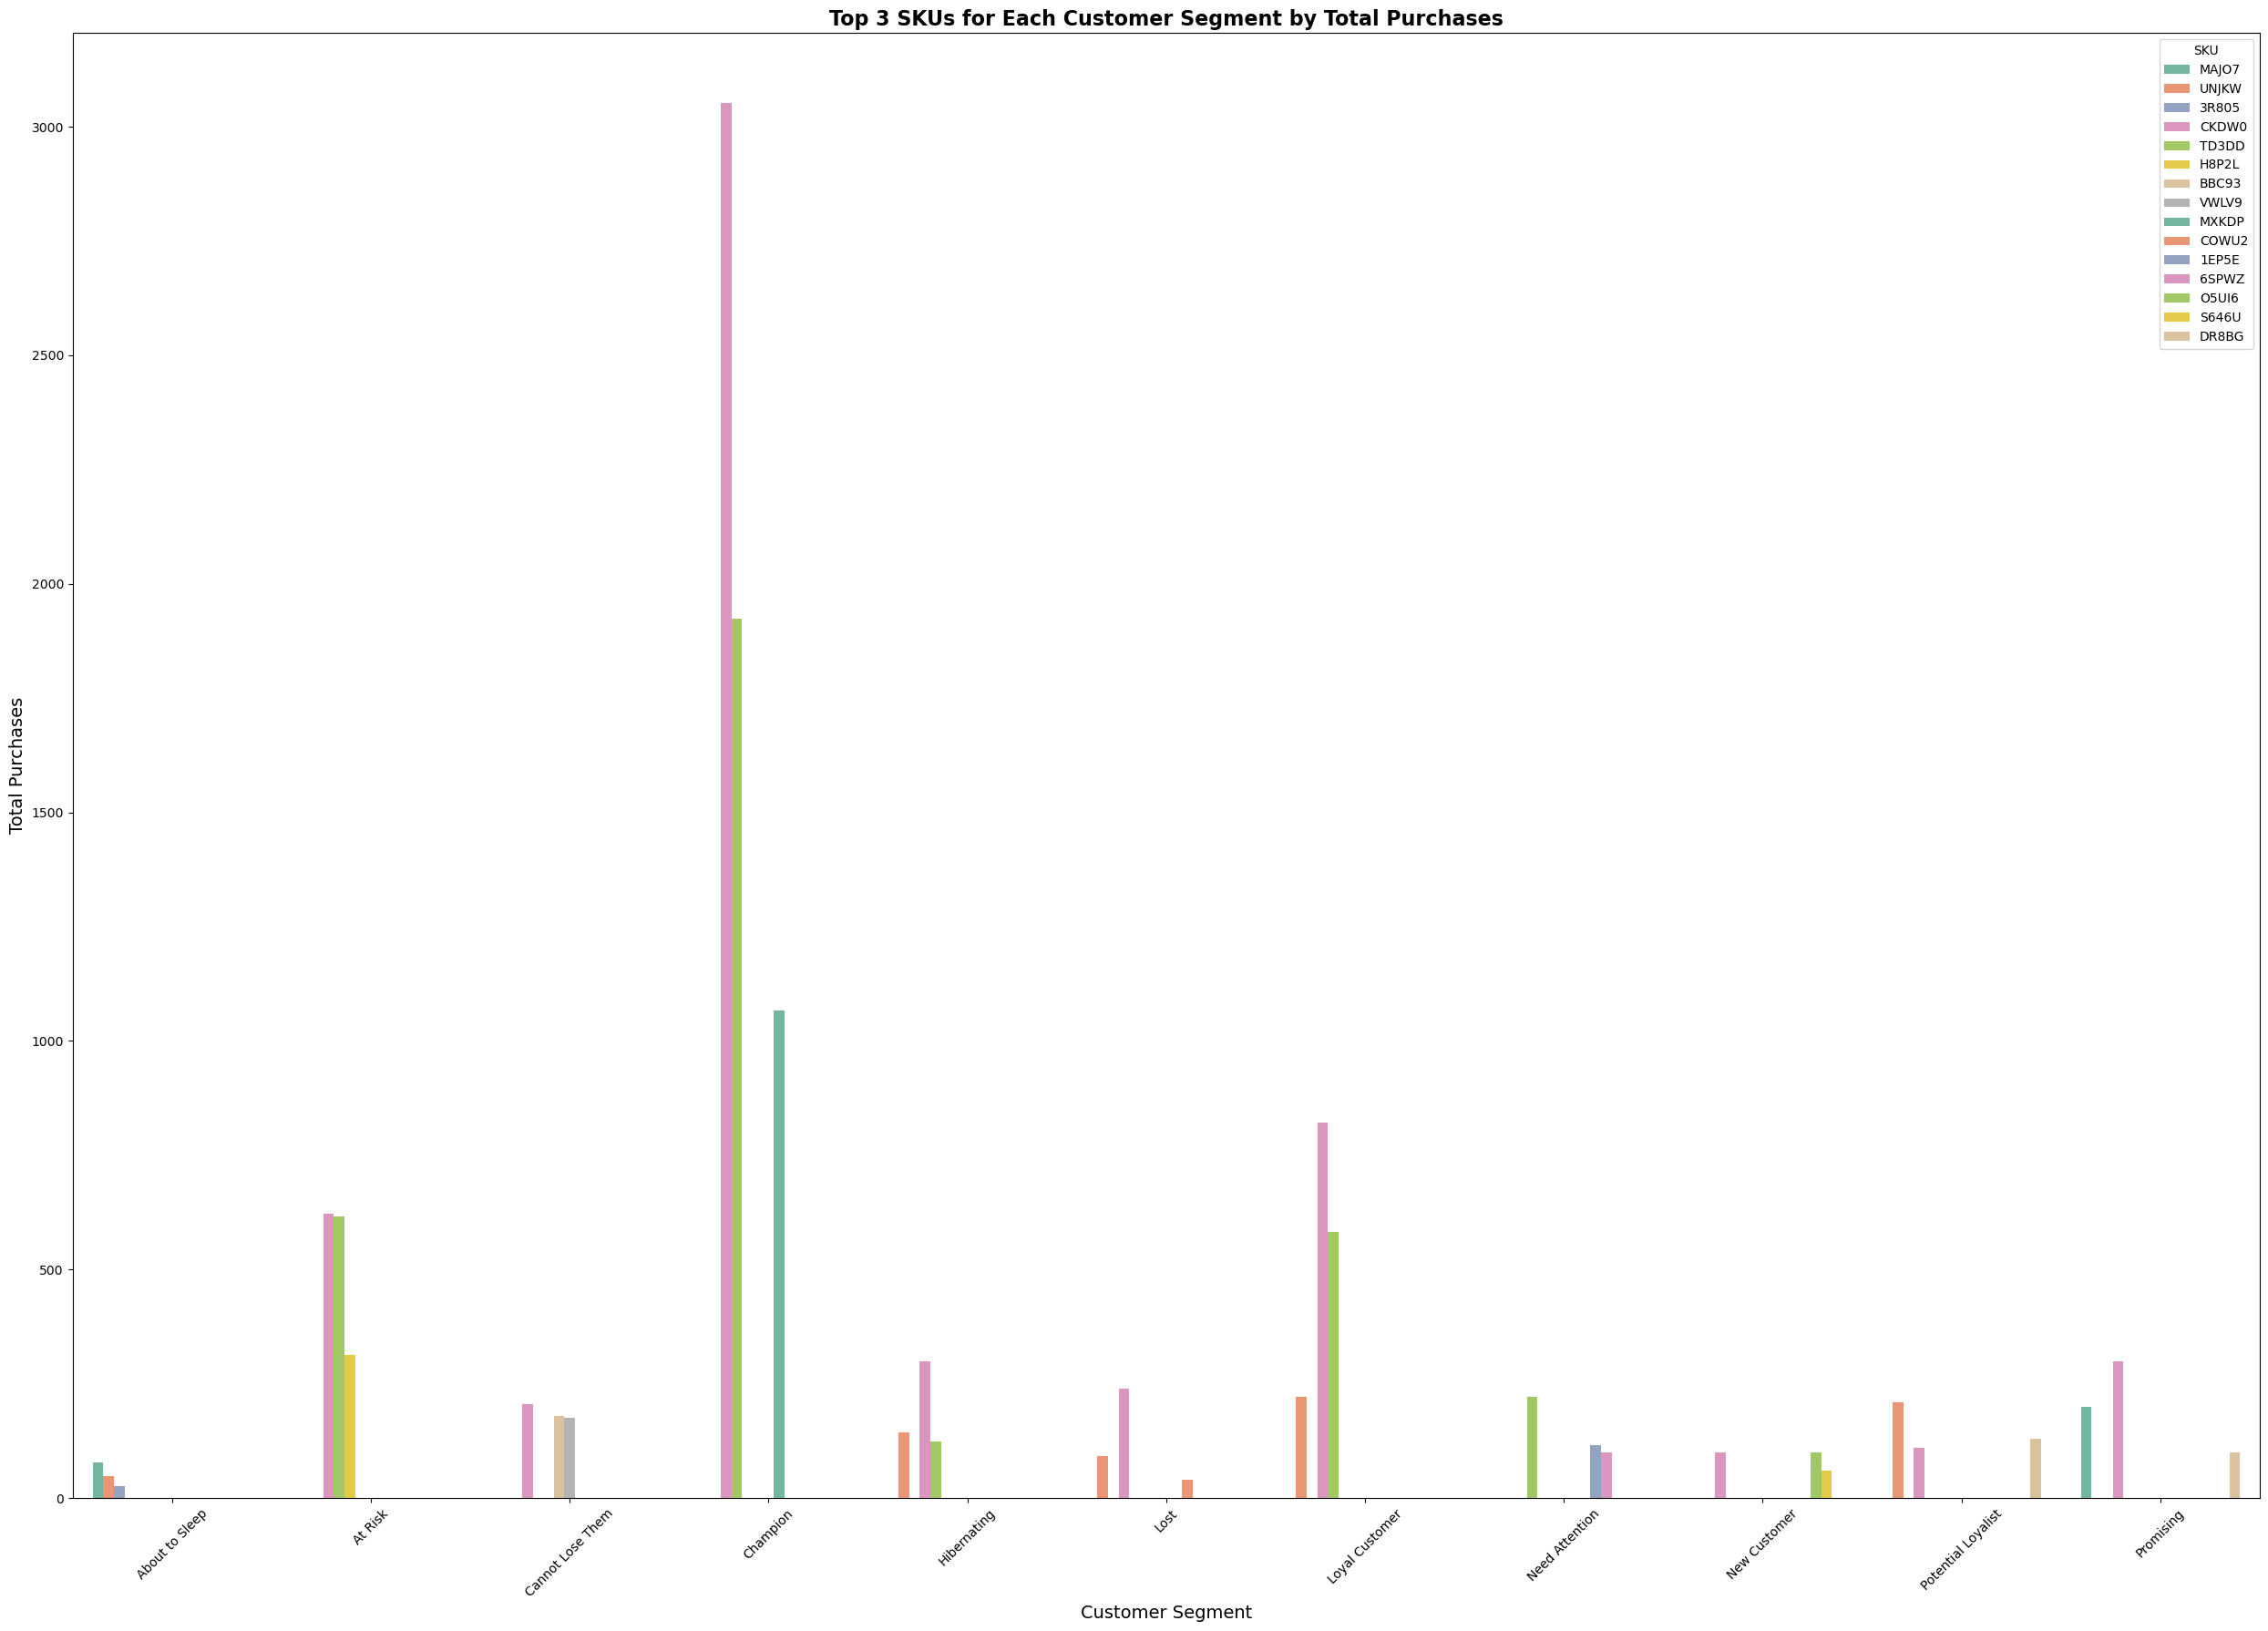

In [135]:
# Step 5: Visualization
plt.figure(figsize=(25, 18))
sns.barplot(
    x='Customer Segment', 
    y='total_purchases', 
    hue='SKU', 
    data=top_3_skus, 
    dodge=True,  # Grouped bars
    palette='Set2'
)

# Add titles and labels
plt.title('Top 3 SKUs for Each Customer Segment by Total Purchases', fontsize=16, fontweight='bold')
plt.xlabel('Customer Segment', fontsize=14)
plt.ylabel('Total Purchases', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='SKU')

# Display the plot
plt.tight_layout()
plt.show()

Terdapat beberapa produk yang muncul di lebih dari tiap segmen. Analisa ini menunjukkan bahwa tiap customer segment memiliki perbedaan top produk, dengan TD3D dan UNJKW mendominasis penjualan di berbagai segmen, seperti Champions dan Loyal Customers. Insights ini membantu dalam menyusun promosi produk dan strategi untuk memaksimalkan frequency dari tiap segmen.

# KESIMPULAN


- Berdasarkan analisis RFM, Champions, Hibernating, Potential Loyalist, At Risk, dan Lost adalah segmen dengan jumlah pelanggan terbanyak dari antara semua segmen di perusahaan.
- N8U, R6E, LPF, P42, dan U5F adalah kategori produk yang paling sering dibeli.
- Dari semua top 3 produk per segmen, TD3D dan UNJKW adalah produk yang paling dominan diantara yang lain.